# Analyzing the Influence of Income on Customer Attributes

## Introduction
This project delves into the analysis of a dataset comprising 2,240 rows and 28 columns, sourced from an online course. The primary objective is to explore and understand the relationship between an individual's their income and other values within the dataset. The dataset encompasses various attributes related to customers, such as their educational background, marital status, income, and purchasing behavior. Investigating the impact of income on these various attributes is essential as it can shed light on socioeconomic disparities and guide more effective marketing strategies tailored to different customer segments.

### Data Collection
The data for this project was obtained through an online course, and the specific sources and collection methods used are not provided. This dataset serves as an educational resource for data analysis and does not have real-world implications. Therefore, while it allows for practice and learning, it may not accurately represent actual socioeconomic or demographic trends.

### Goals of the Project
The main goal of this project is to analyze the dataset and assess how income relates to other series in this dataset. We aim to uncover relationships between income and various attributes of the customers, such as their level of education, marital status, and purchasing behavior. By identifying these relationships, we can gain a comprehensive understanding of the factors that impact income and their implications for marketing strategies and customer engagement. This analysis will serve as a valuable resource for businesses looking to make data-informed decisions and tailor their approaches to different customer segments. Our investigation will provide insights that extend beyond education, allowing us to paint a more complete picture of the dataset's dynamics.


## Table of Contents
- [Data Preprocessing](#data-preprocessing)
- [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
- [Results and Discussion](#results-and-discussion)
- [Conclusion](#conclusion)

## Data Preprocessing

1. Imported external libraries in order to import the csv into my python environment.

In [540]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style='whitegrid')

2. Used the .head() and .info() methods to get more acustomed with the data.

In [541]:
marketing_data = pd.read_csv('marketing_data.csv')
marketing_data.head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [542]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

3. The 'Income' column in the dataset contains a small number of missing values, which will be addressed by removing these entries to ensure data completeness.

4. Additionally, the 'Income' column, currently of data type 'object', will be converted to a numerical data type (integer) to facilitate further in-depth analysis of this variable.

In [543]:
marketing_data.dropna(subset=['Income'], inplace=True)
marketing_data['Income'] = marketing_data['Income'].str.replace('$', '').str.replace(',', '').astype(float)
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2216 non-null   int64  
 1   YearBirth            2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   MaritalStatus        2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   DtCustomer           2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProducts      2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

## Exploratory Data Analysis (EDA)
Conduct an exploratory data analysis to understand the dataset. Visualize data distributions, correlations, and patterns. Use descriptive statistics to summarize data characteristics.

**Exploring Income**

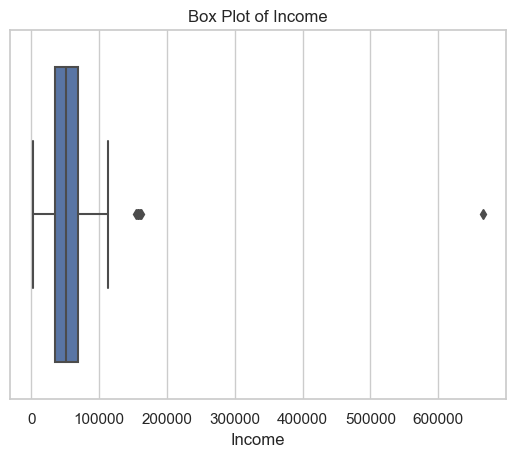

<Figure size 640x480 with 0 Axes>

In [544]:
plt.figure()
sns.boxplot(data=marketing_data, x='Income')
plt.title('Box Plot of Income')
plt.show()
plt.clf()

Observation: There is an outlier in the data that is over 600,000 so I'm going to drop that going forward to better get a sense of the data.

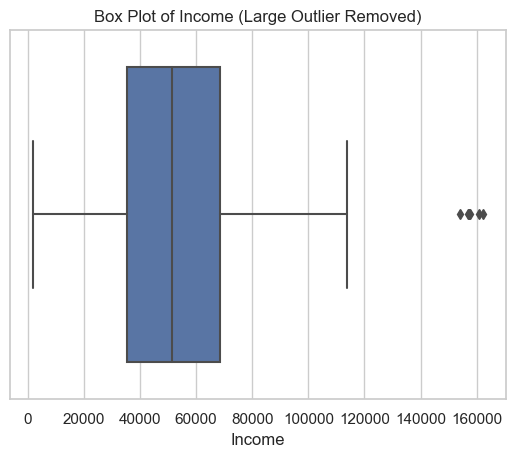

<Figure size 640x480 with 0 Axes>

In [545]:
# Filter the data to exclude outliers
filtered_data = marketing_data[marketing_data['Income'] < 300000]

# Create a boxplot for the filtered 'Income' data
plt.figure()
sns.boxplot(data=filtered_data, x='Income')
plt.title('Box Plot of Income (Large Outlier Removed)')
plt.show()
plt.clf()

Observation: Following the removal of the large outlier, the data becomes significantly more interpretable. While some outliers still exist, they no longer exert an excessive influence on the dataset, facilitating a more focused and manageable investigation. This refinement allows for a clearer analysis of the data.

In [546]:
filtered_data['Income'].describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

**Exploring Education**

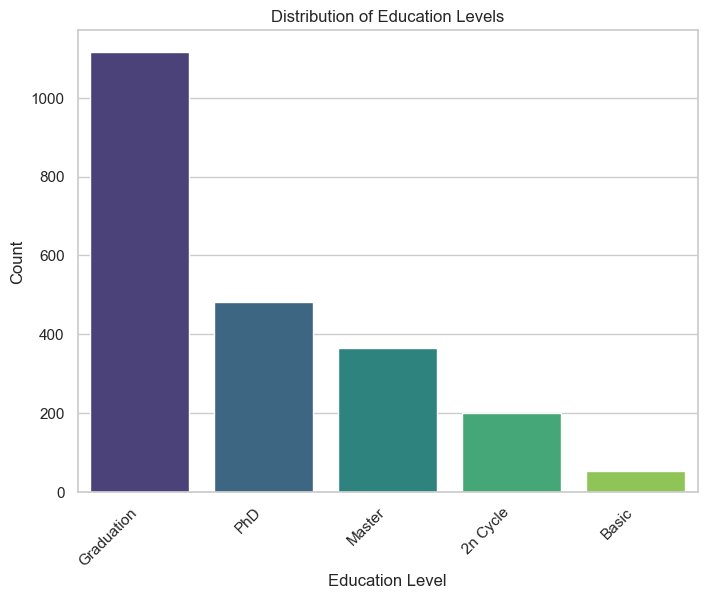

<Figure size 640x480 with 0 Axes>

In [547]:
# Plot the distribution of education levels
plt.figure(figsize=(8, 6))
sns.countplot(data=marketing_data, x='Education', order=marketing_data['Education'].value_counts().index, palette='viridis')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()

In [548]:
marketing_data['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

Observation: The distribution of education levels in the dataset shows that the majority of customers have completed their education at the "Graduation" level, which is likely indicative of a bachelor's degree. This is followed by a significant number of customers with "PhD" and "Master's Degree" qualifications. "2nd Cycle" and "Basic Education" have a smaller representation in the dataset, suggesting that they are less common among the customer base. This distribution provides valuable insights into the educational backgrounds of the customers and can inform marketing and communication strategies tailored to different education levels.

**Exploring the Relationship Between Education Level and Income**

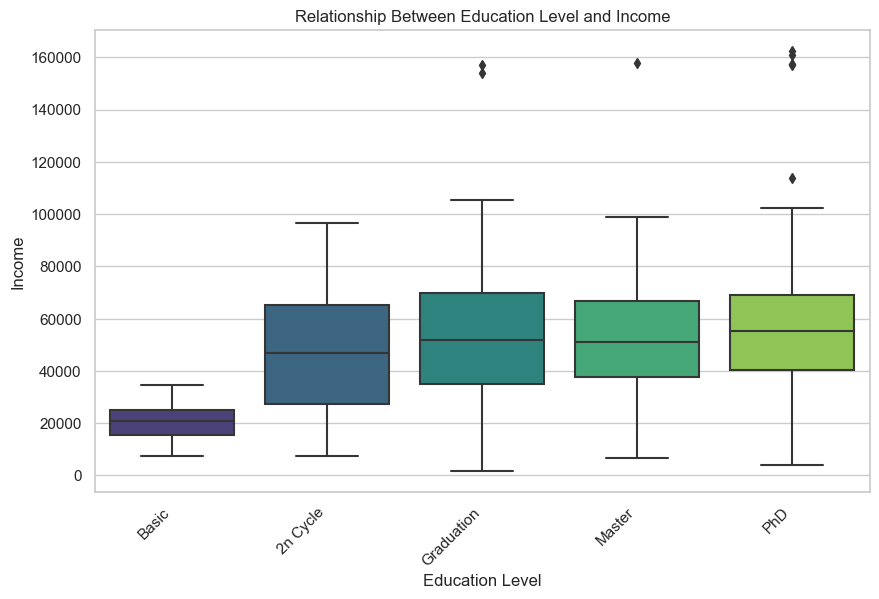

<Figure size 640x480 with 0 Axes>

In [549]:
# Create a box plot to visualize the relationship between education and income
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Education', y='Income', order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], palette='viridis')
plt.title('Relationship Between Education Level and Income')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()

In [550]:
# List of unique education levels
education_levels = filtered_data['Education'].unique()

# Loop through each education level and print the income statistics
for level in education_levels:
    subset = filtered_data[filtered_data['Education'] == level]
    print(f"Education Level: {level}")
    print(subset['Income'].describe())
    print("\n")

Education Level: Graduation
count      1115.000000
mean      52169.749776
std       21354.316952
min        1730.000000
25%       34831.000000
50%       51983.000000
75%       69915.500000
max      157146.000000
Name: Income, dtype: float64


Education Level: PhD
count       481.000000
mean      56145.313929
std       20612.979997
min        4023.000000
25%       40451.000000
50%       55212.000000
75%       69098.000000
max      162397.000000
Name: Income, dtype: float64


Education Level: 2n Cycle
count      200.000000
mean     47633.190000
std      22119.081838
min       7500.000000
25%      27526.500000
50%      46805.000000
75%      65393.250000
max      96547.000000
Name: Income, dtype: float64


Education Level: Master
count       365.000000
mean      52917.534247
std       20157.788029
min        6560.000000
25%       37760.000000
50%       50943.000000
75%       66726.000000
max      157733.000000
Name: Income, dtype: float64


Education Level: Basic
count       54.000000
mean

Observation: The analysis of income across different education levels reveals interesting insights. On average, individuals with a PhD have the highest income, followed closely by those with a Master's degree and Graduation (likely referring to bachelor's degrees). The 2nd Cycle education level has a slightly lower mean income. In contrast, individuals with Basic education have the lowest income, with a significant difference in mean income compared to other education levels. This suggests a strong positive correlation between higher education levels and income, emphasizing the value of advanced degrees in achieving higher earnings.

**Exlporing Marital Status**

In [551]:
filtered_data['MaritalStatus'].value_counts()

MaritalStatus
Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

 - The values 'Alone,' 'YOLO,' and 'Absurd' occur infrequently in the dataset and can be grouped together as 'Single' since they likely represent different ways of expressing a single marital status. This grouping simplifies the analysis and ensures that these rare categories do not overly impact the results.

In [552]:
# Replace specific values in the 'MaritalStatus' column with 'Single'
filtered_data.loc[filtered_data['MaritalStatus'].isin(['Alone', 'YOLO', 'Absurd']), 'MaritalStatus'] = 'Single'
filtered_data['MaritalStatus'].value_counts()

MaritalStatus
Married     857
Together    572
Single      478
Divorced    232
Widow        76
Name: count, dtype: int64

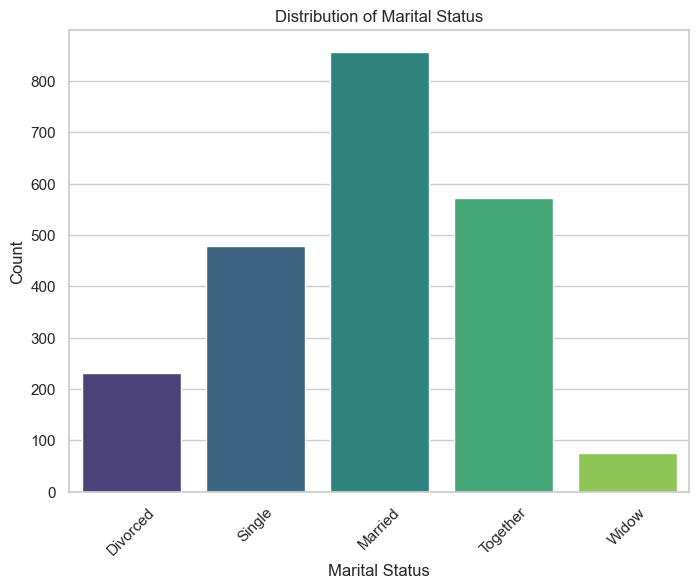

<Figure size 640x480 with 0 Axes>

In [553]:
# Plot the distribution of marital status in filtered_data
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_data, x='MaritalStatus', palette='viridis')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
plt.clf()

Observation: The majority of individuals in the dataset fall into the 'Married' and 'Together' marital status categories, with 'Single,' 'Divorced,' and 'Widow' having fewer occurrences. This indicates that a significant portion of the sample is in a committed relationship, either through marriage or living together, while the number of single, divorced, and widowed individuals is comparatively lower.

**Exploring Relationship Between Marital Status and Income**

To investigate the relationship between marital status and income, I'll calculate the mean income for each marital status group and visualize the results with a bar plot. This will help us understand how income varies across different marital statuses in the dataset.

MaritalStatus
Single      51028.811715
Married     51724.978996
Together    52173.120629
Divorced    52834.228448
Widow       56481.552632
Name: Income, dtype: float64


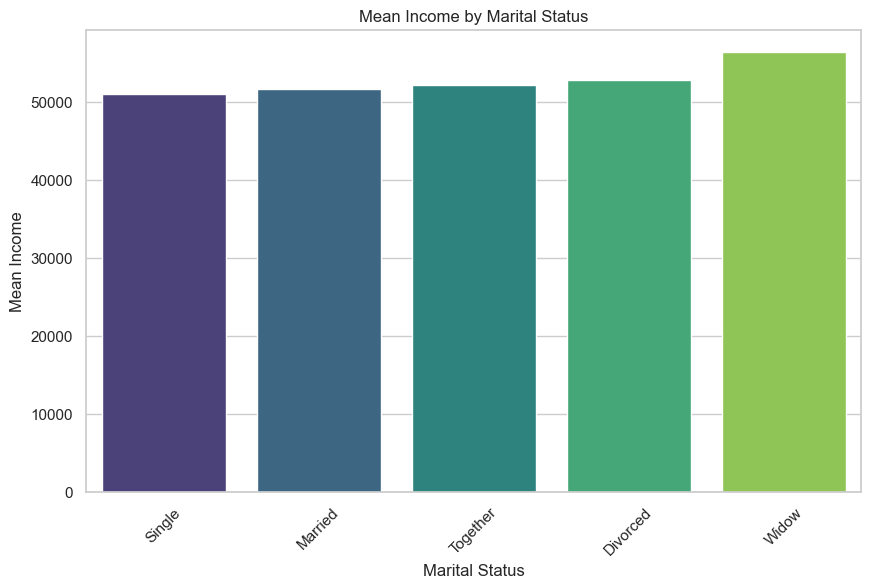

<Figure size 640x480 with 0 Axes>

In [554]:
marital_status_income = filtered_data.groupby('MaritalStatus')['Income'].mean().sort_values()
marital_status_income = marital_status_income

print(marital_status_income)

plt.figure(figsize=(10, 6))
sns.barplot(x=marital_status_income.index, y=marital_status_income.values, palette='viridis')
plt.title('Mean Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Mean Income')
plt.xticks(rotation=45)
plt.show()
plt.clf()

Observation: The mean incomes for different marital statuses are relatively consistent, with all values falling within the range of approximately $51,000 to $56,000. This suggests that marital status might not have a substantial impact on income variation in this dataset. Further statistical analysis is needed to determine the significance of these differences.

In [555]:
marital_statuses = filtered_data['MaritalStatus'].unique()

for i in range(len(marital_statuses)):
    for j in range(i + 1, len(marital_statuses)):
        group1 = filtered_data[filtered_data['MaritalStatus'] == marital_statuses[i]]['Income']
        group2 = filtered_data[filtered_data['MaritalStatus'] == marital_statuses[j]]['Income']
        
        t_stat, p_value = stats.ttest_ind(group1, group2)
        
        print(f'T-Test between {marital_statuses[i]} and {marital_statuses[j]}:')
        print(f'T-Statistic: {t_stat}')
        print(f'P-Value: {p_value}\n')


T-Test between Divorced and Single:
T-Statistic: 1.032521960356962
P-Value: 0.30218023132790084

T-Test between Divorced and Married:
T-Statistic: 0.7002190609229296
P-Value: 0.48394034546167475

T-Test between Divorced and Together:
T-Statistic: 0.39292949453197273
P-Value: 0.6944759735604566

T-Test between Divorced and Widow:
T-Statistic: -1.3628037906559956
P-Value: 0.17394640252076432

T-Test between Single and Married:
T-Statistic: -0.561966532883153
P-Value: 0.5742332975554321

T-Test between Single and Together:
T-Statistic: -0.8416846443185687
P-Value: 0.40015651333777524

T-Test between Single and Widow:
T-Statistic: -2.0537537008486075
P-Value: 0.0404700328753679

T-Test between Married and Together:
T-Statistic: -0.38468283903717426
P-Value: 0.7005297325128685

T-Test between Married and Widow:
T-Statistic: -1.882151060100277
P-Value: 0.0601272121598449

T-Test between Together and Widow:
T-Statistic: -1.6604396437412379
P-Value: 0.0973113035517756



Observation: The t-tests conducted to evaluate income differences between various marital statuses revealed that, in most cases, there was no statistically significant disparity in income based on marital status. The p-values for these comparisons were notably higher than the typical significance level of 0.05, indicating that marital status alone may not be a strong predictor of income differences in this dataset. However, one exception was the significant income difference observed between individuals with a "Single" marital status and those who are "Widow," as the p-value was notably low (0.04). This suggests that while marital status might not be a significant factor in income variations for most groups, there could be other influential factors at play in determining income disparities.

**Exploring Relationship Between Purchasing Behavior and Income**

Creating a new DataFrame that focuses on income and purchase-related columns is a good approach for investigating purchasing behavior. This will allow us to analyze the relationship between income and various types of purchases. To begin, you can select the relevant columns from the original dataset, which include the 'Income' column and any columns associated with purchases. Once this new DataFrame is created, we can proceed with the analysis to gain insights into how income impacts purchasing behavior.

In [556]:
# Select relevant columns
purchase_columns = ['Income'] + [col for col in filtered_data.columns if 'purchase' in col.lower()]
# Create the new DataFrame
purchase_data = filtered_data[purchase_columns]

purchase_data.head()

,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,84835.0,1,4,4,6
1,57091.0,1,7,3,7
2,67267.0,1,3,2,5
3,32474.0,1,1,0,2
4,21474.0,2,3,1,2


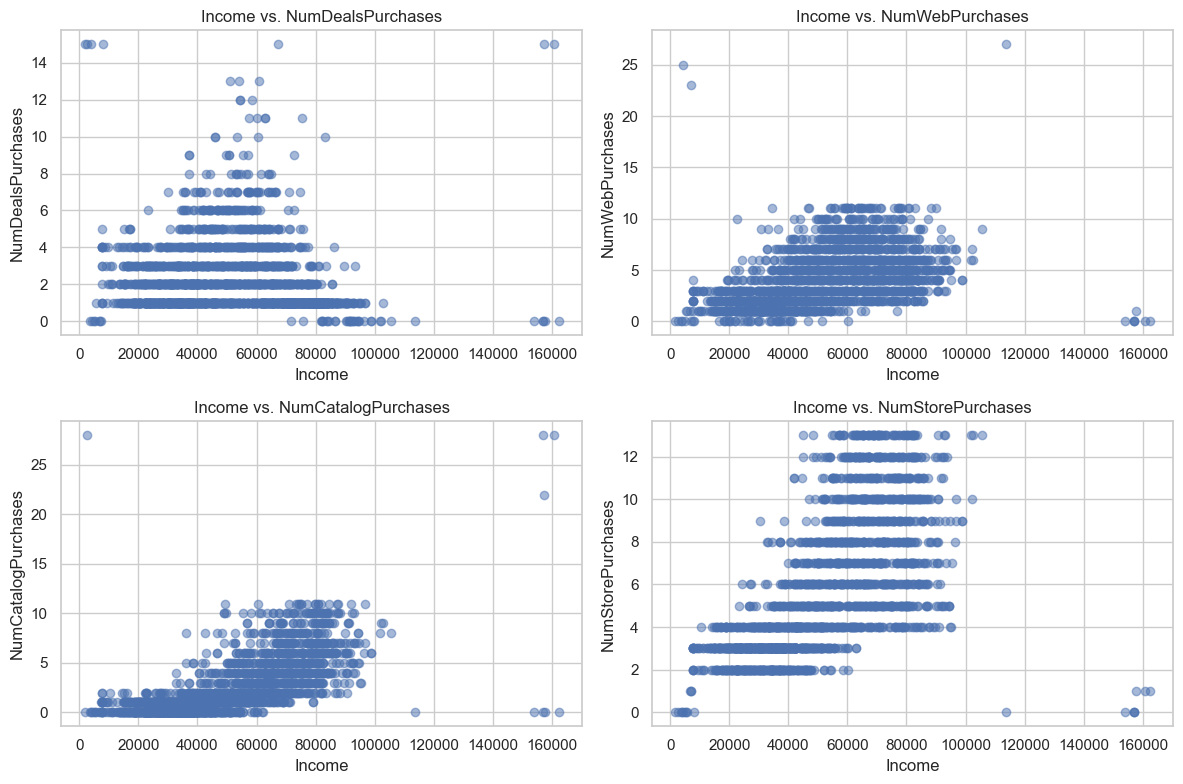

<Figure size 640x480 with 0 Axes>

In [557]:
# Create scatterplots for income vs. purchase metrics
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(purchase_data['Income'], purchase_data['NumDealsPurchases'], alpha=0.5)
plt.title('Income vs. NumDealsPurchases')
plt.xlabel('Income')
plt.ylabel('NumDealsPurchases')

plt.subplot(2, 2, 2)
plt.scatter(purchase_data['Income'], purchase_data['NumWebPurchases'], alpha=0.5)
plt.title('Income vs. NumWebPurchases')
plt.xlabel('Income')
plt.ylabel('NumWebPurchases')

plt.subplot(2, 2, 3)
plt.scatter(purchase_data['Income'], purchase_data['NumCatalogPurchases'], alpha=0.5)
plt.title('Income vs. NumCatalogPurchases')
plt.xlabel('Income')
plt.ylabel('NumCatalogPurchases')

plt.subplot(2, 2, 4)
plt.scatter(purchase_data['Income'], purchase_data['NumStorePurchases'], alpha=0.5)
plt.title('Income vs. NumStorePurchases')
plt.xlabel('Income')
plt.ylabel('NumStorePurchases')

plt.tight_layout()
plt.show()
plt.clf()

In [558]:
correlation_income_purchases = purchase_data[['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].corr()
correlation_income_purchases

,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Income,1.000000,-0.108457,0.458812,0.696541,0.630397
NumDealsPurchases,-0.108457,1.000000,0.241646,-0.011897,0.066468
NumWebPurchases,0.458812,0.241646,1.000000,0.386808,0.516191
NumCatalogPurchases,0.696541,-0.011897,0.386808,1.000000,0.517743
NumStorePurchases,0.630397,0.066468,0.516191,0.517743,1.000000


Observation: The correlation analysis reveals interesting patterns between income and different types of purchases. Higher income is positively correlated with an increased number of web, catalog, and store purchases, indicating that customers with higher income tend to engage in more extensive shopping. However, the number of deals purchases displays a weak negative correlation with income, suggesting that wealthier individuals may be less inclined to participate in deals and discounts. These findings can inform marketing strategies to target specific customer segments effectively.

# Key Findings and Insights from the Project

### Income Analysis
- The 'Income' series initially contained missing values and was of object data type.
- Missing values were dropped, and the data type was changed to an integer for analysis.
- An outlier with a significantly high income was removed to make the data more interpretable.
- The income distribution has a mean of approximately $51,969, a minimum income of $1,730, and a maximum income of $162,397.
- After removing the outlier, the data is more interpretable, with a distribution that falls between $17,300 and $162,400. Although some outliers still exist, they do not significantly skew the data, making it suitable for investigation.

### Education Analysis
- The 'Education' series contains five distinct education levels: Graduation, PhD, Master, 2nd Cycle, and Basic.
- The most common education level is Graduation (likely referring to bachelor's degrees), followed by PhD, Master, 2nd Cycle, and Basic.
- PhD holders have the highest average income, while Basic education level has the lowest average income.

### Relationship Between Education and Income
- There is a clear positive correlation between higher education levels and income.
- Individuals with PhDs tend to have the highest income, followed by those with Master's and bachelor's degrees (Graduation).
- The income levels of individuals with 2nd Cycle education are slightly lower than those with higher degrees.
- Basic education level is associated with the lowest income.

### Marital Status Analysis
- Marital status is categorized into Married, Together, Single, Divorced, and Widow.
- 'Alone,' 'YOLO,' and 'Absurd' were merged into the 'Single' category due to their low frequency.
- Most individuals are either Married, Together, or Single, while Divorced and Widow categories have fewer individuals.
- Widow has the highest average income, while Single has the lowest.

### Relationship Between Marital Status and Income
- The analysis shows that marital status has a limited effect on income levels. The average incomes of Married, Together, Single, and Divorced individuals are quite similar, with Widow having a slightly higher average income.
- Overall, income levels do not exhibit significant variations among different marital statuses.
- T-tests were performed on all possible combinations of marital status to examine their impact on income levels, and the results indicate that income levels do not exhibit significant variations among different marital statuses.

### Purchasing Behavior Analysis
- A new DataFrame focusing on income and purchase-related columns was created to explore the relationship between income and various types of purchases.
- A correlation analysis was conducted to investigate the linear relationship between income and the number of deals, web, catalog, and store purchases.
- The results indicate that income is positively correlated with web, catalog, and store purchases but negatively correlated with deals purchases.
- Higher-income customers tend to make more web, catalog, and store purchases, while lower-income customers are more inclined to participate in deals and discounts.

The main goal of this project was to analyze the dataset and assess how income relates to other series in this dataset. The findings provide valuable insights for marketing strategies and customer segmentation by highlighting the significance of higher education and its positive correlation with income. Additionally, the analysis of marital status and purchasing behavior sheds light on income distribution and customer behavior within the dataset.

## Conclusion

In this project, we have delved into the dataset, focusing on the 'Income' series and its relationships with other variables. We began by addressing data quality concerns within the 'Income' series, which initially contained missing values and had an object data type. After data preprocessing, including the removal of a significant income outlier, we achieved a cleaner, more interpretable income distribution. The data revealed a mean income of approximately $51,969, with a range between $1,730 and $162,397.

Exploring the 'Education' column exposed five distinct education levels: Graduation, PhD, Master, 2nd Cycle, and Basic. Graduation was the most common education level, likely referring to bachelor's degrees, followed by PhD, Master, 2nd Cycle, and Basic. Our analysis identified a positive correlation between higher education levels and income, with individuals holding PhDs exhibiting the highest incomes. Master's and bachelor's degree holders (Graduation) also had significantly higher incomes compared to those with 2nd Cycle education or Basic education, which were associated with lower incomes.

Additionally, we examined the 'Marital Status' series, categorizing individuals into Married, Together, Single, Divorced, and Widow. Some uncommon categories, including 'Alone,' 'YOLO,' and 'Absurd,' were merged into the 'Single' category due to their limited frequency. Our analysis showed that marital status had a limited effect on income levels, with Married, Together, Single, and Divorced individuals exhibiting similar average incomes. The Widow category had a slightly higher average income. We then proceeded to analyze the relationship between marital status and income, concluding that income levels did not significantly vary among different marital statuses based on a t-test.

To further understand customer behavior, a new DataFrame focusing on income and purchase-related columns was created. A correlation analysis explored the linear relationship between income and the number of deals, web, catalog, and store purchases. The findings revealed that income positively correlated with web, catalog, and store purchases, indicating that higher-income customers tend to make more of these types of purchases. Conversely, deals purchases exhibited a negative correlation with income, suggesting that lower-income customers were more inclined to participate in deals and discounts.

Overall, our project's main objective was to explore the relationship between income and other variables within the dataset. The insights gained offer valuable guidance for marketing strategies and customer segmentation. The positive correlation between higher education levels and income underscores the significance of education in income generation. Similarly, the analysis of marital status and purchasing behavior contributes to a better understanding of income distribution and customer behavior within the dataset. These insights will inform data-driven marketing strategies, personalized offerings, and customer engagement techniques, ultimately improving the effectiveness and efficiency of marketing campaigns.